<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2021notebooks/2021komazawa_cogsy000_CNN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像認識モデルの比較

- note: 2021年度 駒澤大学 認知心理学研究 II (b) デモ教材
- date: 2021_09
- author: 浅川伸一 asakawa@ieee.org, educ0233@komazawa-u.ac.jp
- License: MIT

## 注意点
- ブラウザは Google Chrome を仮定します
- クラウド計算環境 である Google Colabratory を使います
- プログラミング言語は python です。ですが python の知識は要求しません
- 一定時間 30 分程度入力が無いと切断してしまいます。必要な場合には，自身の Google drive などにコピーを保存してください。
- 表計算ソフトと同じく，実行単位が一まとまりのセルになっています。
- 各セルを実行するには，シフトキーを押しながら エンターキー(またはリターンキー)を押下する，もしくは，セル右上の黒色三角形をクリックです。
- おおまかには，上のセルから順番に実行していくと，デモが遂行できるようになっています。



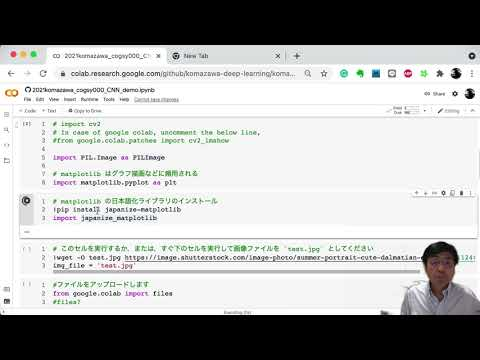

In [1]:
from IPython.display import YouTubeVideo, display
youtube_id = 'Iv3CnDq8_RA'
display(YouTubeVideo(youtube_id, width=800, height=600))

In [ ]:
import numpy as np
import sys

from torchvision import models, transforms
from torch.autograd import Variable
from torch.nn import functional as F
import torch

In [ ]:
import PIL.Image as PILImage
# matplotlib はグラフ描画などに頻用される
import matplotlib.pyplot as plt

In [ ]:
# matplotlib の日本語化ライブラリのインストール
!pip install japanize-matplotlib
import japanize_matplotlib

In [ ]:
# このセルを実行するか，または，すぐ下のセルを実行して画像ファイルを `test.jpg` としてください
!wget -O test.jpg https://image.shutterstock.com/image-photo/summer-portrait-cute-dalmatian-dog-600w-1124451662.jpg
img_file = 'test.jpg'

In [ ]:
#ファイルをアップロードします
from google.colab import files
#files?

In [ ]:
files.upload()  # ご自身の PC からファイルをアップロードして下さい


In [ ]:
img_file = 'test.jpg'
img_pil = PILImage.open(img_file)
plt.title('PIL による画像表示例')
plt.axis(False); plt.imshow(img_pil)

In [ ]:
# どれか一つだけ，事前訓練済のモデルを使用する
import torchvision.models
model = torchvision.models.vgg16(pretrained=True)
#model = torchvision.models.squeezenet1_0(pretrained=True, progress=True)
#model = torchvision.models.densenet161(pretrained=True, progress=True)
#model = torchvision.models.inception_v3(pretrained=True, progress=True)
#model = torchvision.models.googlenet(pretrained=True, progress=True)
#model = torchvision.models.shufflenet_v2_x1_0(pretrained=True, progress=True)
#model = torchvision.models.mobilenet_v2(pretrained=True, progress=True)
#model = torchvision.models.resnext50_32x4d(pretrained=True, progress=True)
#model = torchvision.models.wide_resnet50_2(pretrained=True, progress=True)
#model = torchvision.models.mnasnet1_0(pretrained=True, progress=True)
model = torchvision.models.resnet18(pretrained=True, progress=True)

In [ ]:
# URL が変更になっているようなので，自前で解決するように変更した 
# date: 2021-04-16
#import requests
#
#LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
#
# download the imagenet category list
#classes = {int(key):value for (key, value)
#          in requests.get(LABELS_URL).json().items()}

labelmeta = {"n02119789": ["kit fox", "Vulpes macrotis"], "n02100735": ["English setter"], "n02110185": ["Siberian husky"], "n02096294": ["Australian terrier"], "n02102040": ["English springer", "English springer spaniel"], "n02066245": ["grey whale", "gray whale", "devilfish", "Eschrichtius gibbosus", "Eschrichtius robustus"], "n02509815": ["lesser panda", "red panda", "panda", "bear cat", "cat bear", "Ailurus fulgens"], "n02124075": ["Egyptian cat"], "n02417914": ["ibex", "Capra ibex"], "n02123394": ["Persian cat"], "n02125311": ["cougar", "puma", "catamount", "mountain lion", "painter", "panther", "Felis concolor"], "n02423022": ["gazelle"], "n02346627": ["porcupine", "hedgehog"], "n02077923": ["sea lion"], "n02110063": ["malamute", "malemute", "Alaskan malamute"], "n02447366": ["badger"], "n02109047": ["Great Dane"], "n02089867": ["Walker hound", "Walker foxhound"], "n02102177": ["Welsh springer spaniel"], "n02091134": ["whippet"], "n02092002": ["Scottish deerhound", "deerhound"], "n02071294": ["killer whale", "killer", "orca", "grampus", "sea wolf", "Orcinus orca"], "n02442845": ["mink"], "n02504458": ["African elephant", "Loxodonta africana"], "n02092339": ["Weimaraner"], "n02098105": ["soft-coated wheaten terrier"], "n02096437": ["Dandie Dinmont", "Dandie Dinmont terrier"], "n02114712": ["red wolf", "maned wolf", "Canis rufus", "Canis niger"], "n02105641": ["Old English sheepdog", "bobtail"], "n02128925": ["jaguar", "panther", "Panthera onca", "Felis onca"], "n02091635": ["otterhound", "otter hound"], "n02088466": ["bloodhound", "sleuthhound"], "n02096051": ["Airedale", "Airedale terrier"], "n02117135": ["hyena", "hyaena"], "n02138441": ["meerkat", "mierkat"], "n02097130": ["giant schnauzer"], "n02493509": ["titi", "titi monkey"], "n02457408": ["three-toed sloth", "ai", "Bradypus tridactylus"], "n02389026": ["sorrel"], "n02443484": ["black-footed ferret", "ferret", "Mustela nigripes"], "n02110341": ["dalmatian", "coach dog", "carriage dog"], "n02089078": ["black-and-tan coonhound"], "n02086910": ["papillon"], "n02445715": ["skunk", "polecat", "wood pussy"], "n02093256": ["Staffordshire bullterrier", "Staffordshire bull terrier"], "n02113978": ["Mexican hairless"], "n02106382": ["Bouvier des Flandres", "Bouviers des Flandres"], "n02441942": ["weasel"], "n02113712": ["miniature poodle"], "n02113186": ["Cardigan", "Cardigan Welsh corgi"], "n02105162": ["malinois"], "n02415577": ["bighorn", "bighorn sheep", "cimarron", "Rocky Mountain bighorn", "Rocky Mountain sheep", "Ovis canadensis"], "n02356798": ["fox squirrel", "eastern fox squirrel", "Sciurus niger"], "n02488702": ["colobus", "colobus monkey"], "n02123159": ["tiger cat"], "n02098413": ["Lhasa", "Lhasa apso"], "n02422699": ["impala", "Aepyceros melampus"], "n02114855": ["coyote", "prairie wolf", "brush wolf", "Canis latrans"], "n02094433": ["Yorkshire terrier"], "n02111277": ["Newfoundland", "Newfoundland dog"], "n02132136": ["brown bear", "bruin", "Ursus arctos"], "n02119022": ["red fox", "Vulpes vulpes"], "n02091467": ["Norwegian elkhound", "elkhound"], "n02106550": ["Rottweiler"], "n02422106": ["hartebeest"], "n02091831": ["Saluki", "gazelle hound"], "n02120505": ["grey fox", "gray fox", "Urocyon cinereoargenteus"], "n02104365": ["schipperke"], "n02086079": ["Pekinese", "Pekingese", "Peke"], "n02112706": ["Brabancon griffon"], "n02098286": ["West Highland white terrier"], "n02095889": ["Sealyham terrier", "Sealyham"], "n02484975": ["guenon", "guenon monkey"], "n02137549": ["mongoose"], "n02500267": ["indri", "indris", "Indri indri", "Indri brevicaudatus"], "n02129604": ["tiger", "Panthera tigris"], "n02090721": ["Irish wolfhound"], "n02396427": ["wild boar", "boar", "Sus scrofa"], "n02108000": ["EntleBucher"], "n02391049": ["zebra"], "n02412080": ["ram", "tup"], "n02108915": ["French bulldog"], "n02480495": ["orangutan", "orang", "orangutang", "Pongo pygmaeus"], "n02110806": ["basenji"], "n02128385": ["leopard", "Panthera pardus"], "n02107683": ["Bernese mountain dog"], "n02085936": ["Maltese dog", "Maltese terrier", "Maltese"], "n02094114": ["Norfolk terrier"], "n02087046": ["toy terrier"], "n02100583": ["vizsla", "Hungarian pointer"], "n02096177": ["cairn", "cairn terrier"], "n02494079": ["squirrel monkey", "Saimiri sciureus"], "n02105056": ["groenendael"], "n02101556": ["clumber", "clumber spaniel"], "n02123597": ["Siamese cat", "Siamese"], "n02481823": ["chimpanzee", "chimp", "Pan troglodytes"], "n02105505": ["komondor"], "n02088094": ["Afghan hound", "Afghan"], "n02085782": ["Japanese spaniel"], "n02489166": ["proboscis monkey", "Nasalis larvatus"], "n02364673": ["guinea pig", "Cavia cobaya"], "n02114548": ["white wolf", "Arctic wolf", "Canis lupus tundrarum"], "n02134084": ["ice bear", "polar bear", "Ursus Maritimus", "Thalarctos maritimus"], "n02480855": ["gorilla", "Gorilla gorilla"], "n02090622": ["borzoi", "Russian wolfhound"], "n02113624": ["toy poodle"], "n02093859": ["Kerry blue terrier"], "n02403003": ["ox"], "n02097298": ["Scotch terrier", "Scottish terrier", "Scottie"], "n02108551": ["Tibetan mastiff"], "n02493793": ["spider monkey", "Ateles geoffroyi"], "n02107142": ["Doberman", "Doberman pinscher"], "n02096585": ["Boston bull", "Boston terrier"], "n02107574": ["Greater Swiss Mountain dog"], "n02107908": ["Appenzeller"], "n02086240": ["Shih-Tzu"], "n02102973": ["Irish water spaniel"], "n02112018": ["Pomeranian"], "n02093647": ["Bedlington terrier"], "n02397096": ["warthog"], "n02437312": ["Arabian camel", "dromedary", "Camelus dromedarius"], "n02483708": ["siamang", "Hylobates syndactylus", "Symphalangus syndactylus"], "n02097047": ["miniature schnauzer"], "n02106030": ["collie"], "n02099601": ["golden retriever"], "n02093991": ["Irish terrier"], "n02110627": ["affenpinscher", "monkey pinscher", "monkey dog"], "n02106166": ["Border collie"], "n02326432": ["hare"], "n02108089": ["boxer"], "n02097658": ["silky terrier", "Sydney silky"], "n02088364": ["beagle"], "n02111129": ["Leonberg"], "n02100236": ["German short-haired pointer"], "n02486261": ["patas", "hussar monkey", "Erythrocebus patas"], "n02115913": ["dhole", "Cuon alpinus"], "n02486410": ["baboon"], "n02487347": ["macaque"], "n02099849": ["Chesapeake Bay retriever"], "n02108422": ["bull mastiff"], "n02104029": ["kuvasz"], "n02492035": ["capuchin", "ringtail", "Cebus capucinus"], "n02110958": ["pug", "pug-dog"], "n02099429": ["curly-coated retriever"], "n02094258": ["Norwich terrier"], "n02099267": ["flat-coated retriever"], "n02395406": ["hog", "pig", "grunter", "squealer", "Sus scrofa"], "n02112350": ["keeshond"], "n02109961": ["Eskimo dog", "husky"], "n02101388": ["Brittany spaniel"], "n02113799": ["standard poodle"], "n02095570": ["Lakeland terrier"], "n02128757": ["snow leopard", "ounce", "Panthera uncia"], "n02101006": ["Gordon setter"], "n02115641": ["dingo", "warrigal", "warragal", "Canis dingo"], "n02097209": ["standard schnauzer"], "n02342885": ["hamster"], "n02097474": ["Tibetan terrier", "chrysanthemum dog"], "n02120079": ["Arctic fox", "white fox", "Alopex lagopus"], "n02095314": ["wire-haired fox terrier"], "n02088238": ["basset", "basset hound"], "n02408429": ["water buffalo", "water ox", "Asiatic buffalo", "Bubalus bubalis"], "n02133161": ["American black bear", "black bear", "Ursus americanus", "Euarctos americanus"], "n02328150": ["Angora", "Angora rabbit"], "n02410509": ["bison"], "n02492660": ["howler monkey", "howler"], "n02398521": ["hippopotamus", "hippo", "river horse", "Hippopotamus amphibius"], "n02112137": ["chow", "chow chow"], "n02510455": ["giant panda", "panda", "panda bear", "coon bear", "Ailuropoda melanoleuca"], "n02093428": ["American Staffordshire terrier", "Staffordshire terrier", "American pit bull terrier", "pit bull terrier"], "n02105855": ["Shetland sheepdog", "Shetland sheep dog", "Shetland"], "n02111500": ["Great Pyrenees"], "n02085620": ["Chihuahua"], "n02123045": ["tabby", "tabby cat"], "n02490219": ["marmoset"], "n02099712": ["Labrador retriever"], "n02109525": ["Saint Bernard", "St Bernard"], "n02454379": ["armadillo"], "n02111889": ["Samoyed", "Samoyede"], "n02088632": ["bluetick"], "n02090379": ["redbone"], "n02443114": ["polecat", "fitch", "foulmart", "foumart", "Mustela putorius"], "n02361337": ["marmot"], "n02105412": ["kelpie"], "n02483362": ["gibbon", "Hylobates lar"], "n02437616": ["llama"], "n02107312": ["miniature pinscher"], "n02325366": ["wood rabbit", "cottontail", "cottontail rabbit"], "n02091032": ["Italian greyhound"], "n02129165": ["lion", "king of beasts", "Panthera leo"], "n02102318": ["cocker spaniel", "English cocker spaniel", "cocker"], "n02100877": ["Irish setter", "red setter"], "n02074367": ["dugong", "Dugong dugon"], "n02504013": ["Indian elephant", "Elephas maximus"], "n02363005": ["beaver"], "n02102480": ["Sussex spaniel"], "n02113023": ["Pembroke", "Pembroke Welsh corgi"], "n02086646": ["Blenheim spaniel"], "n02497673": ["Madagascar cat", "ring-tailed lemur", "Lemur catta"], "n02087394": ["Rhodesian ridgeback"], "n02127052": ["lynx", "catamount"], "n02116738": ["African hunting dog", "hyena dog", "Cape hunting dog", "Lycaon pictus"], "n02488291": ["langur"], "n02091244": ["Ibizan hound", "Ibizan Podenco"], "n02114367": ["timber wolf", "grey wolf", "gray wolf", "Canis lupus"], "n02130308": ["cheetah", "chetah", "Acinonyx jubatus"], "n02089973": ["English foxhound"], "n02105251": ["briard"], "n02134418": ["sloth bear", "Melursus ursinus", "Ursus ursinus"], "n02093754": ["Border terrier"], "n02106662": ["German shepherd", "German shepherd dog", "German police dog", "alsatian"], "n02444819": ["otter"], "n01882714": ["koala", "koala bear", "kangaroo bear", "native bear", "Phascolarctos cinereus"], "n01871265": ["tusker"], "n01872401": ["echidna", "spiny anteater", "anteater"], "n01877812": ["wallaby", "brush kangaroo"], "n01873310": ["platypus", "duckbill", "duckbilled platypus", "duck-billed platypus", "Ornithorhynchus anatinus"], "n01883070": ["wombat"], "n04086273": ["revolver", "six-gun", "six-shooter"], "n04507155": ["umbrella"], "n04147183": ["schooner"], "n04254680": ["soccer ball"], "n02672831": ["accordion", "piano accordion", "squeeze box"], "n02219486": ["ant", "emmet", "pismire"], "n02317335": ["starfish", "sea star"], "n01968897": ["chambered nautilus", "pearly nautilus", "nautilus"], "n03452741": ["grand piano", "grand"], "n03642806": ["laptop", "laptop computer"], "n07745940": ["strawberry"], "n02690373": ["airliner"], "n04552348": ["warplane", "military plane"], "n02692877": ["airship", "dirigible"], "n02782093": ["balloon"], "n04266014": ["space shuttle"], "n03344393": ["fireboat"], "n03447447": ["gondola"], "n04273569": ["speedboat"], "n03662601": ["lifeboat"], "n02951358": ["canoe"], "n04612504": ["yawl"], "n02981792": ["catamaran"], "n04483307": ["trimaran"], "n03095699": ["container ship", "containership", "container vessel"], "n03673027": ["liner", "ocean liner"], "n03947888": ["pirate", "pirate ship"], "n02687172": ["aircraft carrier", "carrier", "flattop", "attack aircraft carrier"], "n04347754": ["submarine", "pigboat", "sub", "U-boat"], "n04606251": ["wreck"], "n03478589": ["half track"], "n04389033": ["tank", "army tank", "armored combat vehicle", "armoured combat vehicle"], "n03773504": ["missile"], "n02860847": ["bobsled", "bobsleigh", "bob"], "n03218198": ["dogsled", "dog sled", "dog sleigh"], "n02835271": ["bicycle-built-for-two", "tandem bicycle", "tandem"], "n03792782": ["mountain bike", "all-terrain bike", "off-roader"], "n03393912": ["freight car"], "n03895866": ["passenger car", "coach", "carriage"], "n02797295": ["barrow", "garden cart", "lawn cart", "wheelbarrow"], "n04204347": ["shopping cart"], "n03791053": ["motor scooter", "scooter"], "n03384352": ["forklift"], "n03272562": ["electric locomotive"], "n04310018": ["steam locomotive"], "n02704792": ["amphibian", "amphibious vehicle"], "n02701002": ["ambulance"], "n02814533": ["beach wagon", "station wagon", "wagon", "estate car", "beach waggon", "station waggon", "waggon"], "n02930766": ["cab", "hack", "taxi", "taxicab"], "n03100240": ["convertible"], "n03594945": ["jeep", "landrover"], "n03670208": ["limousine", "limo"], "n03770679": ["minivan"], "n03777568": ["Model T"], "n04037443": ["racer", "race car", "racing car"], "n04285008": ["sports car", "sport car"], "n03444034": ["go-kart"], "n03445924": ["golfcart", "golf cart"], "n03785016": ["moped"], "n04252225": ["snowplow", "snowplough"], "n03345487": ["fire engine", "fire truck"], "n03417042": ["garbage truck", "dustcart"], "n03930630": ["pickup", "pickup truck"], "n04461696": ["tow truck", "tow car", "wrecker"], "n04467665": ["trailer truck", "tractor trailer", "trucking rig", "rig", "articulated lorry", "semi"], "n03796401": ["moving van"], "n03977966": ["police van", "police wagon", "paddy wagon", "patrol wagon", "wagon", "black Maria"], "n04065272": ["recreational vehicle", "RV", "R.V."], "n04335435": ["streetcar", "tram", "tramcar", "trolley", "trolley car"], "n04252077": ["snowmobile"], "n04465501": ["tractor"], "n03776460": ["mobile home", "manufactured home"], "n04482393": ["tricycle", "trike", "velocipede"], "n04509417": ["unicycle", "monocycle"], "n03538406": ["horse cart", "horse-cart"], "n03599486": ["jinrikisha", "ricksha", "rickshaw"], "n03868242": ["oxcart"], "n02804414": ["bassinet"], "n03125729": ["cradle"], "n03131574": ["crib", "cot"], "n03388549": ["four-poster"], "n02870880": ["bookcase"], "n03018349": ["china cabinet", "china closet"], "n03742115": ["medicine chest", "medicine cabinet"], "n03016953": ["chiffonier", "commode"], "n04380533": ["table lamp"], "n03337140": ["file", "file cabinet", "filing cabinet"], "n03891251": ["park bench"], "n02791124": ["barber chair"], "n04429376": ["throne"], "n03376595": ["folding chair"], "n04099969": ["rocking chair", "rocker"], "n04344873": ["studio couch", "day bed"], "n04447861": ["toilet seat"], "n03179701": ["desk"], "n03982430": ["pool table", "billiard table", "snooker table"], "n03201208": ["dining table", "board"], "n03290653": ["entertainment center"], "n04550184": ["wardrobe", "closet", "press"], "n07742313": ["Granny Smith"], "n07747607": ["orange"], "n07749582": ["lemon"], "n07753113": ["fig"], "n07753275": ["pineapple", "ananas"], "n07753592": ["banana"], "n07754684": ["jackfruit", "jak", "jack"], "n07760859": ["custard apple"], "n07768694": ["pomegranate"], "n12267677": ["acorn"], "n12620546": ["hip", "rose hip", "rosehip"], "n13133613": ["ear", "spike", "capitulum"], "n11879895": ["rapeseed"], "n12144580": ["corn"], "n12768682": ["buckeye", "horse chestnut", "conker"], "n03854065": ["organ", "pipe organ"], "n04515003": ["upright", "upright piano"], "n03017168": ["chime", "bell", "gong"], "n03249569": ["drum", "membranophone", "tympan"], "n03447721": ["gong", "tam-tam"], "n03720891": ["maraca"], "n03721384": ["marimba", "xylophone"], "n04311174": ["steel drum"], "n02787622": ["banjo"], "n02992211": ["cello", "violoncello"], "n04536866": ["violin", "fiddle"], "n03495258": ["harp"], "n02676566": ["acoustic guitar"], "n03272010": ["electric guitar"], "n03110669": ["cornet", "horn", "trumpet", "trump"], "n03394916": ["French horn", "horn"], "n04487394": ["trombone"], "n03494278": ["harmonica", "mouth organ", "harp", "mouth harp"], "n03840681": ["ocarina", "sweet potato"], "n03884397": ["panpipe", "pandean pipe", "syrinx"], "n02804610": ["bassoon"], "n03838899": ["oboe", "hautboy", "hautbois"], "n04141076": ["sax", "saxophone"], "n03372029": ["flute", "transverse flute"], "n11939491": ["daisy"], "n12057211": ["yellow lady\'s slipper", "yellow lady-slipper", "Cypripedium calceolus", "Cypripedium parviflorum"], "n09246464": ["cliff", "drop", "drop-off"], "n09468604": ["valley", "vale"], "n09193705": ["alp"], "n09472597": ["volcano"], "n09399592": ["promontory", "headland", "head", "foreland"], "n09421951": ["sandbar", "sand bar"], "n09256479": ["coral reef"], "n09332890": ["lakeside", "lakeshore"], "n09428293": ["seashore", "coast", "seacoast", "sea-coast"], "n09288635": ["geyser"], "n03498962": ["hatchet"], "n03041632": ["cleaver", "meat cleaver", "chopper"], "n03658185": ["letter opener", "paper knife", "paperknife"], "n03954731": ["plane", "carpenter\'s plane", "woodworking plane"], "n03995372": ["power drill"], "n03649909": ["lawn mower", "mower"], "n03481172": ["hammer"], "n03109150": ["corkscrew", "bottle screw"], "n02951585": ["can opener", "tin opener"], "n03970156": ["plunger", "plumber\'s helper"], "n04154565": ["screwdriver"], "n04208210": ["shovel"], "n03967562": ["plow", "plough"], "n03000684": ["chain saw", "chainsaw"], "n01514668": ["cock"], "n01514859": ["hen"], "n01518878": ["ostrich", "Struthio camelus"], "n01530575": ["brambling", "Fringilla montifringilla"], "n01531178": ["goldfinch", "Carduelis carduelis"], "n01532829": ["house finch", "linnet", "Carpodacus mexicanus"], "n01534433": ["junco", "snowbird"], "n01537544": ["indigo bunting", "indigo finch", "indigo bird", "Passerina cyanea"], "n01558993": ["robin", "American robin", "Turdus migratorius"], "n01560419": ["bulbul"], "n01580077": ["jay"], "n01582220": ["magpie"], "n01592084": ["chickadee"], "n01601694": ["water ouzel", "dipper"], "n01608432": ["kite"], "n01614925": ["bald eagle", "American eagle", "Haliaeetus leucocephalus"], "n01616318": ["vulture"], "n01622779": ["great grey owl", "great gray owl", "Strix nebulosa"], "n01795545": ["black grouse"], "n01796340": ["ptarmigan"], "n01797886": ["ruffed grouse", "partridge", "Bonasa umbellus"], "n01798484": ["prairie chicken", "prairie grouse", "prairie fowl"], "n01806143": ["peacock"], "n01806567": ["quail"], "n01807496": ["partridge"], "n01817953": ["African grey", "African gray", "Psittacus erithacus"], "n01818515": ["macaw"], "n01819313": ["sulphur-crested cockatoo", "Kakatoe galerita", "Cacatua galerita"], "n01820546": ["lorikeet"], "n01824575": ["coucal"], "n01828970": ["bee eater"], "n01829413": ["hornbill"], "n01833805": ["hummingbird"], "n01843065": ["jacamar"], "n01843383": ["toucan"], "n01847000": ["drake"], "n01855032": ["red-breasted merganser", "Mergus serrator"], "n01855672": ["goose"], "n01860187": ["black swan", "Cygnus atratus"], "n02002556": ["white stork", "Ciconia ciconia"], "n02002724": ["black stork", "Ciconia nigra"], "n02006656": ["spoonbill"], "n02007558": ["flamingo"], "n02009912": ["American egret", "great white heron", "Egretta albus"], "n02009229": ["little blue heron", "Egretta caerulea"], "n02011460": ["bittern"], "n02012849": ["crane"], "n02013706": ["limpkin", "Aramus pictus"], "n02018207": ["American coot", "marsh hen", "mud hen", "water hen", "Fulica americana"], "n02018795": ["bustard"], "n02025239": ["ruddy turnstone", "Arenaria interpres"], "n02027492": ["red-backed sandpiper", "dunlin", "Erolia alpina"], "n02028035": ["redshank", "Tringa totanus"], "n02033041": ["dowitcher"], "n02037110": ["oystercatcher", "oyster catcher"], "n02017213": ["European gallinule", "Porphyrio porphyrio"], "n02051845": ["pelican"], "n02056570": ["king penguin", "Aptenodytes patagonica"], "n02058221": ["albatross", "mollymawk"], "n01484850": ["great white shark", "white shark", "man-eater", "man-eating shark", "Carcharodon carcharias"], "n01491361": ["tiger shark", "Galeocerdo cuvieri"], "n01494475": ["hammerhead", "hammerhead shark"], "n01496331": ["electric ray", "crampfish", "numbfish", "torpedo"], "n01498041": ["stingray"], "n02514041": ["barracouta", "snoek"], "n02536864": ["coho", "cohoe", "coho salmon", "blue jack", "silver salmon", "Oncorhynchus kisutch"], "n01440764": ["tench", "Tinca tinca"], "n01443537": ["goldfish", "Carassius auratus"], "n02526121": ["eel"], "n02606052": ["rock beauty", "Holocanthus tricolor"], "n02607072": ["anemone fish"], "n02643566": ["lionfish"], "n02655020": ["puffer", "pufferfish", "blowfish", "globefish"], "n02640242": ["sturgeon"], "n02641379": ["gar", "garfish", "garpike", "billfish", "Lepisosteus osseus"], "n01664065": ["loggerhead", "loggerhead turtle", "Caretta caretta"], "n01665541": ["leatherback turtle", "leatherback", "leathery turtle", "Dermochelys coriacea"], "n01667114": ["mud turtle"], "n01667778": ["terrapin"], "n01669191": ["box turtle", "box tortoise"], "n01675722": ["banded gecko"], "n01677366": ["common iguana", "iguana", "Iguana iguana"], "n01682714": ["American chameleon", "anole", "Anolis carolinensis"], "n01685808": ["whiptail", "whiptail lizard"], "n01687978": ["agama"], "n01688243": ["frilled lizard", "Chlamydosaurus kingi"], "n01689811": ["alligator lizard"], "n01692333": ["Gila monster", "Heloderma suspectum"], "n01693334": ["green lizard", "Lacerta viridis"], "n01694178": ["African chameleon", "Chamaeleo chamaeleon"], "n01695060": ["Komodo dragon", "Komodo lizard", "dragon lizard", "giant lizard", "Varanus komodoensis"], "n01704323": ["triceratops"], "n01697457": ["African crocodile", "Nile crocodile", "Crocodylus niloticus"], "n01698640": ["American alligator", "Alligator mississipiensis"], "n01728572": ["thunder snake", "worm snake", "Carphophis amoenus"], "n01728920": ["ringneck snake", "ring-necked snake", "ring snake"], "n01729322": ["hognose snake", "puff adder", "sand viper"], "n01729977": ["green snake", "grass snake"], "n01734418": ["king snake", "kingsnake"], "n01735189": ["garter snake", "grass snake"], "n01737021": ["water snake"], "n01739381": ["vine snake"], "n01740131": ["night snake", "Hypsiglena torquata"], "n01742172": ["boa constrictor", "Constrictor constrictor"], "n01744401": ["rock python", "rock snake", "Python sebae"], "n01748264": ["Indian cobra", "Naja naja"], "n01749939": ["green mamba"], "n01751748": ["sea snake"], "n01753488": ["horned viper", "cerastes", "sand viper", "horned asp", "Cerastes cornutus"], "n01755581": ["diamondback", "diamondback rattlesnake", "Crotalus adamanteus"], "n01756291": ["sidewinder", "horned rattlesnake", "Crotalus cerastes"], "n01629819": ["European fire salamander", "Salamandra salamandra"], "n01630670": ["common newt", "Triturus vulgaris"], "n01631663": ["eft"], "n01632458": ["spotted salamander", "Ambystoma maculatum"], "n01632777": ["axolotl", "mud puppy", "Ambystoma mexicanum"], "n01641577": ["bullfrog", "Rana catesbeiana"], "n01644373": ["tree frog", "tree-frog"], "n01644900": ["tailed frog", "bell toad", "ribbed toad", "tailed toad", "Ascaphus trui"], "n04579432": ["whistle"], "n04592741": ["wing"], "n03876231": ["paintbrush"], "n03483316": ["hand blower", "blow dryer", "blow drier", "hair dryer", "hair drier"], "n03868863": ["oxygen mask"], "n04251144": ["snorkel"], "n03691459": ["loudspeaker", "speaker", "speaker unit", "loudspeaker system", "speaker system"], "n03759954": ["microphone", "mike"], "n04152593": ["screen", "CRT screen"], "n03793489": ["mouse", "computer mouse"], "n03271574": ["electric fan", "blower"], "n03843555": ["oil filter"], "n04332243": ["strainer"], "n04265275": ["space heater"], "n04330267": ["stove"], "n03467068": ["guillotine"], "n02794156": ["barometer"], "n04118776": ["rule", "ruler"], "n03841143": ["odometer", "hodometer", "mileometer", "milometer"], "n04141975": ["scale", "weighing machine"], "n02708093": ["analog clock"], "n03196217": ["digital clock"], "n04548280": ["wall clock"], "n03544143": ["hourglass"], "n04355338": ["sundial"], "n03891332": ["parking meter"], "n04328186": ["stopwatch", "stop watch"], "n03197337": ["digital watch"], "n04317175": ["stethoscope"], "n04376876": ["syringe"], "n03706229": ["magnetic compass"], "n02841315": ["binoculars", "field glasses", "opera glasses"], "n04009552": ["projector"], "n04356056": ["sunglasses", "dark glasses", "shades"], "n03692522": ["loupe", "jeweler\'s loupe"], "n04044716": ["radio telescope", "radio reflector"], "n02879718": ["bow"], "n02950826": ["cannon"], "n02749479": ["assault rifle", "assault gun"], "n04090263": ["rifle"], "n04008634": ["projectile", "missile"], "n03085013": ["computer keyboard", "keypad"], "n04505470": ["typewriter keyboard"], "n03126707": ["crane"], "n03666591": ["lighter", "light", "igniter", "ignitor"], "n02666196": ["abacus"], "n02977058": ["cash machine", "cash dispenser", "automated teller machine", "automatic teller machine", "automated teller", "automatic teller", "ATM"], "n04238763": ["slide rule", "slipstick"], "n03180011": ["desktop computer"], "n03485407": ["hand-held computer", "hand-held microcomputer"], "n03832673": ["notebook", "notebook computer"], "n06359193": ["web site", "website", "internet site", "site"], "n03496892": ["harvester", "reaper"], "n04428191": ["thresher", "thrasher", "threshing machine"], "n04004767": ["printer"], "n04243546": ["slot", "one-armed bandit"], "n04525305": ["vending machine"], "n04179913": ["sewing machine"], "n03602883": ["joystick"], "n04372370": ["switch", "electric switch", "electrical switch"], "n03532672": ["hook", "claw"], "n02974003": ["car wheel"], "n03874293": ["paddlewheel", "paddle wheel"], "n03944341": ["pinwheel"], "n03992509": ["potter\'s wheel"], "n03425413": ["gas pump", "gasoline pump", "petrol pump", "island dispenser"], "n02966193": ["carousel", "carrousel", "merry-go-round", "roundabout", "whirligig"], "n04371774": ["swing"], "n04067472": ["reel"], "n04040759": ["radiator"], "n04019541": ["puck", "hockey puck"], "n03492542": ["hard disc", "hard disk", "fixed disk"], "n04355933": ["sunglass"], "n03929660": ["pick", "plectrum", "plectron"], "n02965783": ["car mirror"], "n04258138": ["solar dish", "solar collector", "solar furnace"], "n04074963": ["remote control", "remote"], "n03208938": ["disk brake", "disc brake"], "n02910353": ["buckle"], "n03476684": ["hair slide"], "n03627232": ["knot"], "n03075370": ["combination lock"], "n03874599": ["padlock"], "n03804744": ["nail"], "n04127249": ["safety pin"], "n04153751": ["screw"], "n03803284": ["muzzle"], "n04162706": ["seat belt", "seatbelt"], "n04228054": ["ski"], "n02948072": ["candle", "taper", "wax light"], "n03590841": ["jack-o\'-lantern"], "n04286575": ["spotlight", "spot"], "n04456115": ["torch"], "n03814639": ["neck brace"], "n03933933": ["pier"], "n04485082": ["tripod"], "n03733131": ["maypole"], "n03794056": ["mousetrap"], "n04275548": ["spider web", "spider\'s web"], "n01768244": ["trilobite"], "n01770081": ["harvestman", "daddy longlegs", "Phalangium opilio"], "n01770393": ["scorpion"], "n01773157": ["black and gold garden spider", "Argiope aurantia"], "n01773549": ["barn spider", "Araneus cavaticus"], "n01773797": ["garden spider", "Aranea diademata"], "n01774384": ["black widow", "Latrodectus mactans"], "n01774750": ["tarantula"], "n01775062": ["wolf spider", "hunting spider"], "n01776313": ["tick"], "n01784675": ["centipede"], "n01990800": ["isopod"], "n01978287": ["Dungeness crab", "Cancer magister"], "n01978455": ["rock crab", "Cancer irroratus"], "n01980166": ["fiddler crab"], "n01981276": ["king crab", "Alaska crab", "Alaskan king crab", "Alaska king crab", "Paralithodes camtschatica"], "n01983481": ["American lobster", "Northern lobster", "Maine lobster", "Homarus americanus"], "n01984695": ["spiny lobster", "langouste", "rock lobster", "crawfish", "crayfish", "sea crawfish"], "n01985128": ["crayfish", "crawfish", "crawdad", "crawdaddy"], "n01986214": ["hermit crab"], "n02165105": ["tiger beetle"], "n02165456": ["ladybug", "ladybeetle", "lady beetle", "ladybird", "ladybird beetle"], "n02167151": ["ground beetle", "carabid beetle"], "n02168699": ["long-horned beetle", "longicorn", "longicorn beetle"], "n02169497": ["leaf beetle", "chrysomelid"], "n02172182": ["dung beetle"], "n02174001": ["rhinoceros beetle"], "n02177972": ["weevil"], "n02190166": ["fly"], "n02206856": ["bee"], "n02226429": ["grasshopper", "hopper"], "n02229544": ["cricket"], "n02231487": ["walking stick", "walkingstick", "stick insect"], "n02233338": ["cockroach", "roach"], "n02236044": ["mantis", "mantid"], "n02256656": ["cicada", "cicala"], "n02259212": ["leafhopper"], "n02264363": ["lacewing", "lacewing fly"], "n02268443": ["dragonfly", "darning needle", "devil\'s darning needle", "sewing needle", "snake feeder", "snake doctor", "mosquito hawk", "skeeter hawk"], "n02268853": ["damselfly"], "n02276258": ["admiral"], "n02277742": ["ringlet", "ringlet butterfly"], "n02279972": ["monarch", "monarch butterfly", "milkweed butterfly", "Danaus plexippus"], "n02280649": ["cabbage butterfly"], "n02281406": ["sulphur butterfly", "sulfur butterfly"], "n02281787": ["lycaenid", "lycaenid butterfly"], "n01910747": ["jellyfish"], "n01914609": ["sea anemone", "anemone"], "n01917289": ["brain coral"], "n01924916": ["flatworm", "platyhelminth"], "n01930112": ["nematode", "nematode worm", "roundworm"], "n01943899": ["conch"], "n01944390": ["snail"], "n01945685": ["slug"], "n01950731": ["sea slug", "nudibranch"], "n01955084": ["chiton", "coat-of-mail shell", "sea cradle", "polyplacophore"], "n02319095": ["sea urchin"], "n02321529": ["sea cucumber", "holothurian"], "n03584829": ["iron", "smoothing iron"], "n03297495": ["espresso maker"], "n03761084": ["microwave", "microwave oven"], "n03259280": ["Dutch oven"], "n04111531": ["rotisserie"], "n04442312": ["toaster"], "n04542943": ["waffle iron"], "n04517823": ["vacuum", "vacuum cleaner"], "n03207941": ["dishwasher", "dish washer", "dishwashing machine"], "n04070727": ["refrigerator", "icebox"], "n04554684": ["washer", "automatic washer", "washing machine"], "n03133878": ["Crock Pot"], "n03400231": ["frying pan", "frypan", "skillet"], "n04596742": ["wok"], "n02939185": ["caldron", "cauldron"], "n03063689": ["coffeepot"], "n04398044": ["teapot"], "n04270147": ["spatula"], "n02699494": ["altar"], "n04486054": ["triumphal arch"], "n03899768": ["patio", "terrace"], "n04311004": ["steel arch bridge"], "n04366367": ["suspension bridge"], "n04532670": ["viaduct"], "n02793495": ["barn"], "n03457902": ["greenhouse", "nursery", "glasshouse"], "n03877845": ["palace"], "n03781244": ["monastery"], "n03661043": ["library"], "n02727426": ["apiary", "bee house"], "n02859443": ["boathouse"], "n03028079": ["church", "church building"], "n03788195": ["mosque"], "n04346328": ["stupa", "tope"], "n03956157": ["planetarium"], "n04081281": ["restaurant", "eating house", "eating place", "eatery"], "n03032252": ["cinema", "movie theater", "movie theatre", "movie house", "picture palace"], "n03529860": ["home theater", "home theatre"], "n03697007": ["lumbermill", "sawmill"], "n03065424": ["coil", "spiral", "volute", "whorl", "helix"], "n03837869": ["obelisk"], "n04458633": ["totem pole"], "n02980441": ["castle"], "n04005630": ["prison", "prison house"], "n03461385": ["grocery store", "grocery", "food market", "market"], "n02776631": ["bakery", "bakeshop", "bakehouse"], "n02791270": ["barbershop"], "n02871525": ["bookshop", "bookstore", "bookstall"], "n02927161": ["butcher shop", "meat market"], "n03089624": ["confectionery", "confectionary", "candy store"], "n04200800": ["shoe shop", "shoe-shop", "shoe store"], "n04443257": ["tobacco shop", "tobacconist shop", "tobacconist"], "n04462240": ["toyshop"], "n03388043": ["fountain"], "n03042490": ["cliff dwelling"], "n04613696": ["yurt"], "n03216828": ["dock", "dockage", "docking facility"], "n02892201": ["brass", "memorial tablet", "plaque"], "n03743016": ["megalith", "megalithic structure"], "n02788148": ["bannister", "banister", "balustrade", "balusters", "handrail"], "n02894605": ["breakwater", "groin", "groyne", "mole", "bulwark", "seawall", "jetty"], "n03160309": ["dam", "dike", "dyke"], "n03000134": ["chainlink fence"], "n03930313": ["picket fence", "paling"], "n04604644": ["worm fence", "snake fence", "snake-rail fence", "Virginia fence"], "n04326547": ["stone wall"], "n03459775": ["grille", "radiator grille"], "n04239074": ["sliding door"], "n04501370": ["turnstile"], "n03792972": ["mountain tent"], "n04149813": ["scoreboard"], "n03530642": ["honeycomb"], "n03961711": ["plate rack"], "n03903868": ["pedestal", "plinth", "footstall"], "n02814860": ["beacon", "lighthouse", "beacon light", "pharos"], "n07711569": ["mashed potato"], "n07720875": ["bell pepper"], "n07714571": ["head cabbage"], "n07714990": ["broccoli"], "n07715103": ["cauliflower"], "n07716358": ["zucchini", "courgette"], "n07716906": ["spaghetti squash"], "n07717410": ["acorn squash"], "n07717556": ["butternut squash"], "n07718472": ["cucumber", "cuke"], "n07718747": ["artichoke", "globe artichoke"], "n07730033": ["cardoon"], "n07734744": ["mushroom"], "n04209239": ["shower curtain"], "n03594734": ["jean", "blue jean", "denim"], "n02971356": ["carton"], "n03485794": ["handkerchief", "hankie", "hanky", "hankey"], "n04133789": ["sandal"], "n02747177": ["ashcan", "trash can", "garbage can", "wastebin", "ash bin", "ash-bin", "ashbin", "dustbin", "trash barrel", "trash bin"], "n04125021": ["safe"], "n07579787": ["plate"], "n03814906": ["necklace"], "n03134739": ["croquet ball"], "n03404251": ["fur coat"], "n04423845": ["thimble"], "n03877472": ["pajama", "pyjama", "pj\'s", "jammies"], "n04120489": ["running shoe"], "n03062245": ["cocktail shaker"], "n03014705": ["chest"], "n03717622": ["manhole cover"], "n03777754": ["modem"], "n04493381": ["tub", "vat"], "n04476259": ["tray"], "n02777292": ["balance beam", "beam"], "n07693725": ["bagel", "beigel"], "n03998194": ["prayer rug", "prayer mat"], "n03617480": ["kimono"], "n07590611": ["hot pot", "hotpot"], "n04579145": ["whiskey jug"], "n03623198": ["knee pad"], "n07248320": ["book jacket", "dust cover", "dust jacket", "dust wrapper"], "n04277352": ["spindle"], "n04229816": ["ski mask"], "n02823428": ["beer bottle"], "n03127747": ["crash helmet"], "n02877765": ["bottlecap"], "n04435653": ["tile roof"], "n03724870": ["mask"], "n03710637": ["maillot"], "n03920288": ["Petri dish"], "n03379051": ["football helmet"], "n02807133": ["bathing cap", "swimming cap"], "n04399382": ["teddy", "teddy bear"], "n03527444": ["holster"], "n03983396": ["pop bottle", "soda bottle"], "n03924679": ["photocopier"], "n04532106": ["vestment"], "n06785654": ["crossword puzzle", "crossword"], "n03445777": ["golf ball"], "n07613480": ["trifle"], "n04350905": ["suit", "suit of clothes"], "n04562935": ["water tower"], "n03325584": ["feather boa", "boa"], "n03045698": ["cloak"], "n07892512": ["red wine"], "n03250847": ["drumstick"], "n04192698": ["shield", "buckler"], "n03026506": ["Christmas stocking"], "n03534580": ["hoopskirt", "crinoline"], "n07565083": ["menu"], "n04296562": ["stage"], "n02869837": ["bonnet", "poke bonnet"], "n07871810": ["meat loaf", "meatloaf"], "n02799071": ["baseball"], "n03314780": ["face powder"], "n04141327": ["scabbard"], "n04357314": ["sunscreen", "sunblock", "sun blocker"], "n02823750": ["beer glass"], "n13052670": ["hen-of-the-woods", "hen of the woods", "Polyporus frondosus", "Grifola frondosa"], "n07583066": ["guacamole"], "n03637318": ["lampshade", "lamp shade"], "n04599235": ["wool", "woolen", "woollen"], "n07802026": ["hay"], "n02883205": ["bow tie", "bow-tie", "bowtie"], "n03709823": ["mailbag", "postbag"], "n04560804": ["water jug"], "n02909870": ["bucket", "pail"], "n03207743": ["dishrag", "dishcloth"], "n04263257": ["soup bowl"], "n07932039": ["eggnog"], "n03786901": ["mortar"], "n04479046": ["trench coat"], "n03873416": ["paddle", "boat paddle"], "n02999410": ["chain"], "n04367480": ["swab", "swob", "mop"], "n03775546": ["mixing bowl"], "n07875152": ["potpie"], "n04591713": ["wine bottle"], "n04201297": ["shoji"], "n02916936": ["bulletproof vest"], "n03240683": ["drilling platform", "offshore rig"], "n02840245": ["binder", "ring-binder"], "n02963159": ["cardigan"], "n04370456": ["sweatshirt"], "n03991062": ["pot", "flowerpot"], "n02843684": ["birdhouse"], "n03482405": ["hamper"], "n03942813": ["ping-pong ball"], "n03908618": ["pencil box", "pencil case"], "n03902125": ["pay-phone", "pay-station"], "n07584110": ["consomme"], "n02730930": ["apron"], "n04023962": ["punching bag", "punch bag", "punching ball", "punchball"], "n02769748": ["backpack", "back pack", "knapsack", "packsack", "rucksack", "haversack"], "n10148035": ["groom", "bridegroom"], "n02817516": ["bearskin", "busby", "shako"], "n03908714": ["pencil sharpener"], "n02906734": ["broom"], "n03788365": ["mosquito net"], "n02667093": ["abaya"], "n03787032": ["mortarboard"], "n03980874": ["poncho"], "n03141823": ["crutch"], "n03976467": ["Polaroid camera", "Polaroid Land camera"], "n04264628": ["space bar"], "n07930864": ["cup"], "n04039381": ["racket", "racquet"], "n06874185": ["traffic light", "traffic signal", "stoplight"], "n04033901": ["quill", "quill pen"], "n04041544": ["radio", "wireless"], "n07860988": ["dough"], "n03146219": ["cuirass"], "n03763968": ["military uniform"], "n03676483": ["lipstick", "lip rouge"], "n04209133": ["shower cap"], "n03782006": ["monitor"], "n03857828": ["oscilloscope", "scope", "cathode-ray oscilloscope", "CRO"], "n03775071": ["mitten"], "n02892767": ["brassiere", "bra", "bandeau"], "n07684084": ["French loaf"], "n04522168": ["vase"], "n03764736": ["milk can"], "n04118538": ["rugby ball"], "n03887697": ["paper towel"], "n13044778": ["earthstar"], "n03291819": ["envelope"], "n03770439": ["miniskirt", "mini"], "n03124170": ["cowboy hat", "ten-gallon hat"], "n04487081": ["trolleybus", "trolley coach", "trackless trolley"], "n03916031": ["perfume", "essence"], "n02808440": ["bathtub", "bathing tub", "bath", "tub"], "n07697537": ["hotdog", "hot dog", "red hot"], "n12985857": ["coral fungus"], "n02917067": ["bullet train", "bullet"], "n03938244": ["pillow"], "n15075141": ["toilet tissue", "toilet paper", "bathroom tissue"], "n02978881": ["cassette"], "n02966687": ["carpenter\'s kit", "tool kit"], "n03633091": ["ladle"], "n13040303": ["stinkhorn", "carrion fungus"], "n03690938": ["lotion"], "n03476991": ["hair spray"], "n02669723": ["academic gown", "academic robe", "judge\'s robe"], "n03220513": ["dome"], "n03127925": ["crate"], "n04584207": ["wig"], "n07880968": ["burrito"], "n03937543": ["pill bottle"], "n03000247": ["chain mail", "ring mail", "mail", "chain armor", "chain armour", "ring armor", "ring armour"], "n04418357": ["theater curtain", "theatre curtain"], "n04590129": ["window shade"], "n02795169": ["barrel", "cask"], "n04553703": ["washbasin", "handbasin", "washbowl", "lavabo", "wash-hand basin"], "n02783161": ["ballpoint", "ballpoint pen", "ballpen", "Biro"], "n02802426": ["basketball"], "n02808304": ["bath towel"], "n03124043": ["cowboy boot"], "n03450230": ["gown"], "n04589890": ["window screen"], "n12998815": ["agaric"], "n02992529": ["cellular telephone", "cellular phone", "cellphone", "cell", "mobile phone"], "n03825788": ["nipple"], "n02790996": ["barbell"], "n03710193": ["mailbox", "letter box"], "n03630383": ["lab coat", "laboratory coat"], "n03347037": ["fire screen", "fireguard"], "n03769881": ["minibus"], "n03871628": ["packet"], "n03733281": ["maze", "labyrinth"], "n03976657": ["pole"], "n03535780": ["horizontal bar", "high bar"], "n04259630": ["sombrero"], "n03929855": ["pickelhaube"], "n04049303": ["rain barrel"], "n04548362": ["wallet", "billfold", "notecase", "pocketbook"], "n02979186": ["cassette player"], "n06596364": ["comic book"], "n03935335": ["piggy bank", "penny bank"], "n06794110": ["street sign"], "n02825657": ["bell cote", "bell cot"], "n03388183": ["fountain pen"], "n04591157": ["Windsor tie"], "n04540053": ["volleyball"], "n03866082": ["overskirt"], "n04136333": ["sarong"], "n04026417": ["purse"], "n02865351": ["bolo tie", "bolo", "bola tie", "bola"], "n02834397": ["bib"], "n03888257": ["parachute", "chute"], "n04235860": ["sleeping bag"], "n04404412": ["television", "television system"], "n04371430": ["swimming trunks", "bathing trunks"], "n03733805": ["measuring cup"], "n07920052": ["espresso"], "n07873807": ["pizza", "pizza pie"], "n02895154": ["breastplate", "aegis", "egis"], "n04204238": ["shopping basket"], "n04597913": ["wooden spoon"], "n04131690": ["saltshaker", "salt shaker"], "n07836838": ["chocolate sauce", "chocolate syrup"], "n09835506": ["ballplayer", "baseball player"], "n03443371": ["goblet"], "n13037406": ["gyromitra"], "n04336792": ["stretcher"], "n04557648": ["water bottle"], "n03187595": ["dial telephone", "dial phone"], "n04254120": ["soap dispenser"], "n03595614": ["jersey", "T-shirt", "tee shirt"], "n04146614": ["school bus"], "n03598930": ["jigsaw puzzle"], "n03958227": ["plastic bag"], "n04069434": ["reflex camera"], "n03188531": ["diaper", "nappy", "napkin"], "n02786058": ["Band Aid"], "n07615774": ["ice lolly", "lolly", "lollipop", "popsicle"], "n04525038": ["velvet"], "n04409515": ["tennis ball"], "n03424325": ["gasmask", "respirator", "gas helmet"], "n03223299": ["doormat", "welcome mat"], "n03680355": ["Loafer"], "n07614500": ["ice cream", "icecream"], "n07695742": ["pretzel"], "n04033995": ["quilt", "comforter", "comfort", "puff"], "n03710721": ["maillot", "tank suit"], "n04392985": ["tape player"], "n03047690": ["clog", "geta", "patten", "sabot"], "n03584254": ["iPod"], "n13054560": ["bolete"], "n10565667": ["scuba diver"], "n03950228": ["pitcher", "ewer"], "n03729826": ["matchstick"], "n02837789": ["bikini", "two-piece"], "n04254777": ["sock"], "n02988304": ["CD player"], "n03657121": ["lens cap", "lens cover"], "n04417672": ["thatch", "thatched roof"], "n04523525": ["vault"], "n02815834": ["beaker"], "n09229709": ["bubble"], "n07697313": ["cheeseburger"], "n03888605": ["parallel bars", "bars"], "n03355925": ["flagpole", "flagstaff"], "n03063599": ["coffee mug"], "n04116512": ["rubber eraser", "rubber", "pencil eraser"], "n04325704": ["stole"], "n07831146": ["carbonara"], "n03255030": ["dumbbell"]}
#classes ={i:labelmeta[x] for i, x in enumerate(labelmeta)}

from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw')
class_list = list(labelmeta.keys())

In [ ]:
# RGB 各チャンネルの平均と分散の定義。CNN 唯一の前処理
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

transform = torchvision.transforms.Compose([
    #torchvision.transforms.Resize(256), 
    torchvision.transforms.Resize((224,224)), 
    torchvision.transforms.ToTensor(),
    transforms.Normalize(mean, std)  # 標準化)
    ])


def print_class_names(img=None, model=model, n_best=5):
    inputs = transform(img).unsqueeze_(0)
    model.eval()
    out = model(inputs)
    prob = torch.nn.functional.softmax(out[0], dim=0)  # 戻り値を softmax を使って確率に変換
    ids = np.argsort(- out.detach().numpy()[0])        # 認識した画像のクラス番号

    for i in range(n_best):
        print(f'{i+1:3d} {prob[ids[i]]:.3f}', end=" ")
        class_id = class_list[ids[i]]

        # class_id から wordnet の pos と offset を求める
        pos, offset = class_id[0], int(class_id[1:])

        # wordnet の項目を得る
        synset = wordnet.synset_from_pos_and_offset(pos,offset)  

        # wordnet に日本語があれば日本語化
        lang = 'jpn' if synset.lemmas(lang='jpn') else 'eng'

        # クラス名得る
        name = str(synset.lemmas(lang=lang)[0]).split('.')[-1].replace('\')','') 

        # クラス名，クラスid, クラスsynset の印字
        print(f'{name} ({ids[i]}:{class_id})')                   

n_best = 10  # 上位 n_best 項目を表示する設定
print_class_names(img=img_pil, n_best=n_best)
